В данном кейсе необходимо было выполнить следующие задачи:
1.	Выберите наиболее релевантную выборку пользователей для проведения анализа.
2.	Для каждого пользователя рассчитайте Recency, Frequency, Monetary по описанному алгоритму.
3.	Дайте оценку RFM. Сгруппируйте пользователей по категориям.
4.	Постройте графики и сделайте выводы.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("data.csv", encoding='cp1251')

In [2]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
data['Date'] = pd.to_datetime(data['InvoiceDate']).dt.date
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09


In [4]:
data = data.dropna(axis=0, how='any', inplace=False)
data = data[(data['UnitPrice']>0)&(data['Quantity']>0)]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09


In [5]:
now = data['Date'].max()
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [6]:
RFM = data.groupby('CustomerID', as_index = False).agg({'Date': lambda x: (now - x.max()).days, # Recency
                                                'InvoiceNo': lambda x: len(x.unique()), # Frequency
                                                'Revenue': lambda x: x.sum()}) # Monetary 

RFM['Date'] = RFM['Date'].astype(int)

RFM.rename(columns={'Date': 'Recency', 
                    'InvoiceNo': 'Frequency',
                    'Revenue': 'Monetary'}, inplace=True)
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2094.88


In [7]:
RFM.sort_values(by = 'CustomerID')

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2094.88


In [8]:
RFM['Frequency'].describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Frequency, dtype: float64

In [9]:
RFM['Monetary'].describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

In [10]:
def Rgrad(x):
    if x < 61:
        return 1
    elif 61 <= x <= 180:
        return 2
    elif x > 180: 
        return 3
    
def Fgrad(x):
    if x < 2:
        return 3
    elif 2 <= x <= 5:
        return 2
    elif x > 5:
        return 1
    
def Mgrad(x):
    if x < 675:
        return 3
    elif 675 <= x <= 1661:
        return 2
    elif x > 1661:
        return 1

In [11]:
RFM['RG'] = RFM['Recency'].apply(Rgrad)
RFM['FG'] = RFM['Frequency'].apply(Fgrad)
RFM['MG'] = RFM['Monetary'].apply(Mgrad)
RFM['RFM'] = RFM['RG'].map(str)+str('-')+ RFM['FG'].map(str) + RFM['MG'].map(str)
RFM

,CustomerID,Recency,Frequency,Monetary,RG,FG,MG,RFM
0,12346.0,325,1,77183.60,3,3,1,331
1,12347.0,2,7,4310.00,1,1,1,111
2,12348.0,75,4,1797.24,2,2,1,221
3,12349.0,18,1,1757.55,1,3,1,131
4,12350.0,310,1,334.40,3,3,3,333
...,...,...,...,...,...,...,...,...
4333,18280.0,277,1,180.60,3,3,3,333
4334,18281.0,180,1,80.82,2,3,3,233
4335,18282.0,7,2,178.05,1,2,3,123
4336,18283.0,3,16,2094.88,1,1,1,111


In [44]:
op1 = RFM.groupby('RG', as_index=False).agg({'CustomerID': 'count'})
op2 = RFM.groupby('FG', as_index=False).agg({'CustomerID': 'count'})
op3 = RFM.groupby('MG', as_index=False).agg({'CustomerID': 'count'})
op = pd.merge(op1, op2, left_on='RG', right_on='FG', how='left')
op = pd.merge(op, op3, left_on='RG', right_on='MG', how='left')
op.rename(columns={'RG':'Группа','CustomerID_x':'Численность группы по Recency', 'CustomerID_y':'Численность группы по Frequency', 'CustomerID':'Численность группы по Monetary'}, inplace=True)
op.drop(columns=['FG', 'MG'], inplace=True)
op

,Группа,Численность группы по Recency,Численность группы по Frequency,Численность группы по Monetary
0,1,2410,872,1088
1,2,1070,1973,1078
2,3,858,1493,2172


In [14]:
viv = RFM.groupby('RFM', as_index=False).agg({'CustomerID': 'count'})
viv.rename(columns={'CustomerID':'Кол-во пользователей, чел.'}, inplace=True)
viv.sort_values(by=['Кол-во пользователей, чел.'], ascending=False, inplace=True)
viv

,RFM,"Кол-во пользователей, чел."
0,111,664
26,333,577
4,122,525
5,123,425
8,133,406
17,233,366
14,223,247
13,222,233
3,121,229
23,323,143


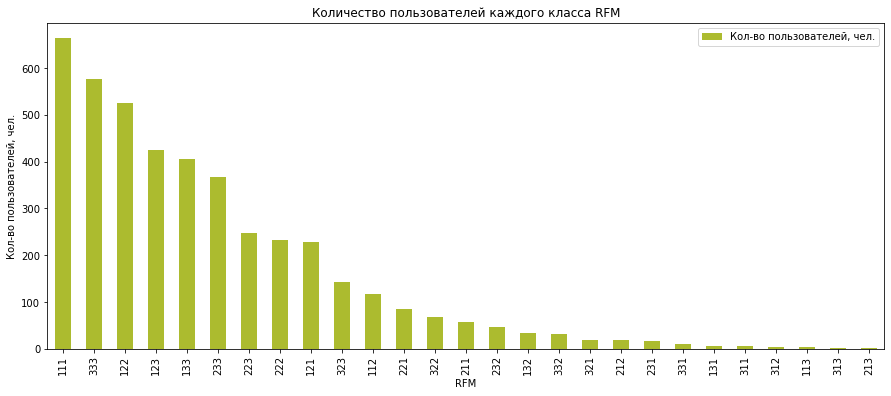

In [15]:
viv[['RFM', 'Кол-во пользователей, чел.']].plot(x='RFM', kind='bar', figsize=(15,6), color=['#ACBB2F'])
plt.title('Количество пользователей каждого класса RFM')
plt.xlabel('RFM')
plt.ylabel('Кол-во пользователей, чел.')
plt.show()

По результатам данного анализа мы получили 27 групп клиентов, каждая из которой характеризуется своими особенностями. Таким образом из графика видно, что преобладающей группой является группа '111', в которую вошли недавние клиенты с высоким чеком и частым посещением. Данная группа насчитывает 664 клиента. Однако на втором месте по количеству клиентов находится группа '333', которая характеризуется давними клиентами с низким чеков и разовостью входа, что является не сильно хорошим показателям и компании стоит поработать над повторным привлечением старых клиентов и не только. Тажке более 400 клиентов (а примерно больше 10% клиентов) насчитывают такие группы как 122 - недавние, редкие, со средним чеком (525 клиентов), 123 - недавние, редкие, с низким чеком (425 клиентов) и 133 - недавние, разовые, с низким чеком (406 клиентов). Исходя из этого можно сделать вывод о том, что компании стоит поработать над увеличением продаж и над активностью клиентов (например, с помощью бонусной программы, которая будет мотивировать клиентов чаще обращаться в данную компанию). Также мы имеем 7 групп клиентов, которые включают в себя меньше 10 человек, т.е. меньше 1% от всей базы клиентов. Данные 7 групп в основном характеризуются средними показателями. 

Компании стоит сделать упор на работу с активностью клиентов, т.е. попробовать улучшить качество товаров и услуг, разработать программу лояльности, предлагать скидки и акции и т.д., это может мотивировать клиента совершать покупки чаще и увеличить вероятность его возвращения. Также это может повлиять на средний чек клиентов, а это тоже направление, над котором стоило бы провести работу.